<a href="https://colab.research.google.com/github/chethanabhaskara/Early-diagonsis-of-Alzheimer-s-disease/blob/master/longitudinal_data_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<font size="4">A) Using Longitudinal Data for training</font>


In [0]:
file_path = 'https://raw.githubusercontent.com/chethanabhaskara/Early-diagonsis-of-Alzheimer-s-disease/master/oasis_longitudinal.csv'
df = pd.read_csv(file_path)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


<font size="4">B) Exploring Characterisitics of Data - Initial Data Analysis

In [0]:
# only the ones with visit==1
df = df.loc[df['Visit']==1]
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [0]:
# reset index after filtering first visit data
df = df.reset_index(drop=True)
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
5,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205
7,OAS2_0010,OAS2_0010_MR1,Demented,1,0,F,R,66,12,3.0,30.0,0.5,1447,0.769,1.213
8,OAS2_0012,OAS2_0012_MR1,Nondemented,1,0,F,R,78,16,2.0,29.0,0.0,1333,0.748,1.316
9,OAS2_0013,OAS2_0013_MR1,Nondemented,1,0,F,R,81,12,4.0,30.0,0.0,1230,0.715,1.427


In [0]:
# replace M and F with 1 and 0
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])
df.head(15)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,0,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,1,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,1,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
5,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,0,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,OAS2_0009,OAS2_0009_MR1,Demented,1,0,1,R,68,12,2.0,27.0,0.5,1457,0.806,1.205
7,OAS2_0010,OAS2_0010_MR1,Demented,1,0,0,R,66,12,3.0,30.0,0.5,1447,0.769,1.213
8,OAS2_0012,OAS2_0012_MR1,Nondemented,1,0,0,R,78,16,2.0,29.0,0.0,1333,0.748,1.316
9,OAS2_0013,OAS2_0013_MR1,Nondemented,1,0,0,R,81,12,4.0,30.0,0.0,1230,0.715,1.427


In [0]:
# Target variable
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Classification'] = df['Group']
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])
# Drop unnecessary columns
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1)
df.head(15)

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Classification
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,Nondemented
1,OAS2_0002,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046,Demented
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,Nondemented
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039,Nondemented
4,OAS2_0007,1,0,1,71,16,NaN,28.0,0.5,1357,0.748,1.293,Demented
5,OAS2_0008,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380,Nondemented
6,OAS2_0009,1,0,1,68,12,2.0,27.0,0.5,1457,0.806,1.205,Demented
7,OAS2_0010,1,0,0,66,12,3.0,30.0,0.5,1447,0.769,1.213,Demented
8,OAS2_0012,0,0,0,78,16,2.0,29.0,0.0,1333,0.748,1.316,Nondemented
9,OAS2_0013,0,0,0,81,12,4.0,30.0,0.0,1230,0.715,1.427,Nondemented


Text(0.5, 1.0, 'Gender and Demented rate')

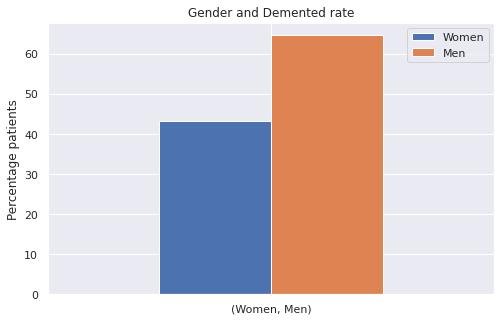

In [0]:
demented = df[df['Group']==1]
demented_women = demented[demented['M/F']==0]['Group']
demented_women_count = demented_women.count()
demented_men = demented[demented['M/F']==1]['Group']
demented_men_count = demented_men.count()

non_demented = df[df['Group']==0]
non_demented_women = non_demented[non_demented['M/F']==0]['Group']
non_demented_women_count = non_demented_women.count()
non_demented_men = non_demented[non_demented['M/F']==1]['Group']
non_demented_men_count = non_demented_men.count()


percent_demented_women = demented_women_count*100/(demented_women_count + non_demented_women_count)
percent_demented_men = demented_men_count*100/(demented_men_count + non_demented_men_count)

df_bar = pd.DataFrame( {'Women': [percent_demented_women], 'Men': [percent_demented_men]} )
df_bar.index = [['Women'],['Men']]
df_bar.plot(kind='bar', figsize=(8,5))
plt.ylabel('Percentage patients')
plt.legend()
plt.xticks(rotation=0)
plt.title('Gender and Demented rate')

The above graph indicates that men are more likely with dementia than women.

**MMSE : Mini Mental State Examination**

Text(0.5, 0, 'MMSE')

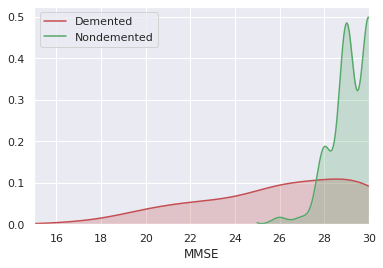

In [0]:
# a4_dims = (13, 3)
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['MMSE'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['MMSE'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlim(15,30)
plt.xlabel('MMSE')
# Nondemented has higher test result ranging from 25 to 30.

**ASF - Atlas Scaling Factor**

Text(0.5, 0, 'ASF')

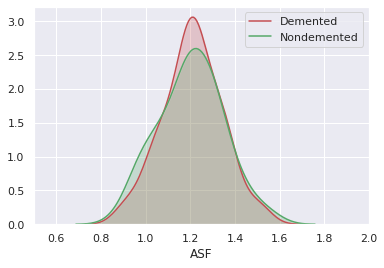

In [0]:
# a4_dims = (13, 3)
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['ASF'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['ASF'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlim(0.5, 2)
plt.xlabel('ASF')


**eTIV - Estimated Total Intracranial Volume**


Text(0.5, 0, 'eTIV')

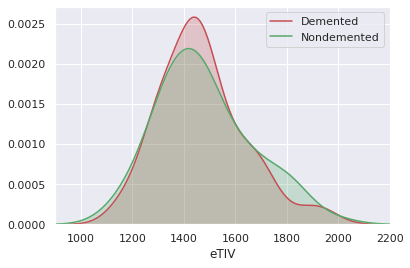

In [0]:
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['eTIV'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['eTIV'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlim(900, 2200)
plt.xlabel('eTIV')

**nWBV = Normalized Whole Brain Volume**

Text(0.5, 0, 'nWBV')

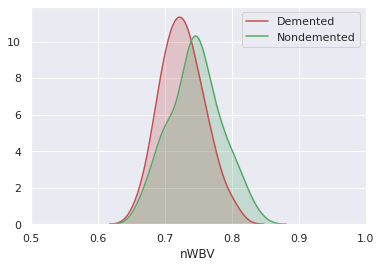

In [0]:
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['nWBV'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['nWBV'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlim(0.5, 1.0)
plt.xlabel('nWBV')

**Age**

Text(0.5, 0, 'Age')

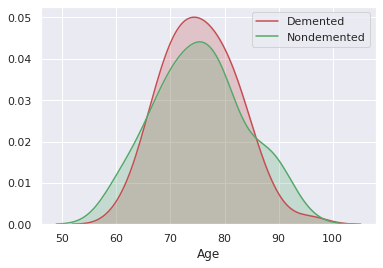

In [0]:
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['Age'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['Age'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlabel('Age')

**Education**

Text(0.5, 0, 'EDUC')

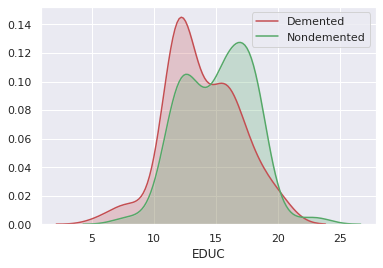

In [0]:
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['EDUC'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['EDUC'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlabel('EDUC')

The chart indicates that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.

There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

<font size=3>C) Intermediate Result Summary

1. Men are more likely with demented, an Alzheimer's Disease, than Women.<br/>
2. Demented patients were less educated in terms of years of education.<br/>
3. Nondemented group has higher brain volume than Demented group.<br/>
4. Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.

In [0]:
# Imputation for 8 missing values in SES column.
pd.isnull(df).sum() 

Subject ID        0
Group             0
MR Delay          0
M/F               0
Age               0
EDUC              0
SES               8
MMSE              0
CDR               0
eTIV              0
nWBV              0
ASF               0
Classification    0
dtype: int64

<font size=4> D) Pre-Processing Data

Since the SES is a discrete variable, we use median for the imputation.

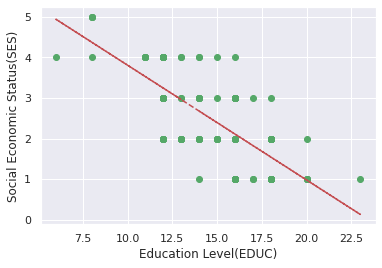

In [0]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']
ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]
# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [0]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [0]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [0]:
pd.isnull(df['SES']).value_counts() # all 150 rows are not null

False    150
Name: SES, dtype: int64

In [0]:
pd.isnull(df).sum() # No more missing vals

Subject ID        0
Group             0
MR Delay          0
M/F               0
Age               0
EDUC              0
SES               0
MMSE              0
CDR               0
eTIV              0
nWBV              0
ASF               0
Classification    0
dtype: int64

<font size=4>E) Splitting Train/Validation/Test Sets

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [0]:
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state=0)

In [0]:
print(X_trainval)

     M/F  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
61     0   73     8  5.0  25.0  1151  0.743  1.525
92     0   76    12  3.0  27.0  1315  0.698  1.335
112    0   73    16  2.0  29.0  1123  0.786  1.563
2      0   88    18  3.0  28.0  1215  0.710  1.444
141    1   68    14  3.0  26.0  1444  0.778  1.216
..   ...  ...   ...  ...   ...   ...    ...    ...
9      0   81    12  4.0  30.0  1230  0.715  1.427
103    0   74    12  3.0  29.0  1344  0.739  1.306
67     0   82    12  4.0  26.0  1271  0.695  1.381
117    0   89    18  2.0  30.0  1715  0.746  1.023
47     0   81    12  2.0  30.0  1599  0.755  1.098

[112 rows x 8 columns]


In [0]:
print(Y_trainval)

[1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 0]


In [0]:
print(X_test)

     M/F  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
114    0   76    16  3.0  26.0  1391  0.705  1.262
62     0   66    18  2.0  30.0  1504  0.725  1.167
33     0   72    12  4.0  26.0  1453  0.777  1.208
107    0   65    12  2.0  30.0  1340  0.754  1.309
7      0   66    12  3.0  30.0  1447  0.769  1.213
100    0   73    11  4.0  30.0  1475  0.726  1.190
40     1   71    12  4.0  20.0  1461  0.724  1.202
86     1   70    16  1.0  25.0  1568  0.696  1.119
76     0   61    16  1.0  30.0  1513  0.771  1.160
71     1   78    12  4.0  21.0  1477  0.672  1.188
134    1   78    12  3.0  23.0  1491  0.710  1.177
51     0   79    18  2.0  29.0  1641  0.695  1.069
73     1   73    18  2.0  29.0  1548  0.773  1.134
54     1   61    18  1.0  30.0  1957  0.734  0.897
63     1   69    16  2.0  28.0  1848  0.737  0.950
37     0   77    16  2.0  29.0  1433  0.723  1.225
78     0   89    13  3.0  29.0  1154  0.750  1.521
90     1   81    11  4.0  28.0  1750  0.670  1.003
45     1   65    13  3.0  29.0 

In [0]:
print(Y_test)

[1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1
 0]


In [0]:
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

<font size=4>F) Model Training

<font size=4>1) Logistic Regression

The parameter C, inverse of regularization strength.
<br>Tuning range: [0.0001, 0.001, 0.1, 1, 10, 100, 1000]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
performance_metric = [] # list to store all performance metric
max_test_auc=0
req_obj=None

In [0]:
# Dataset with imputation
best_score = 0
kfolds = 8 # set the number of folds

In [0]:
for c in [0.0001,0.001, 0.1, 1, 10, 100,1000]:
    Model = LogisticRegression(C=c, solver='liblinear') # liblinear good for small dataset
    # perform cross-validation
    scores = cross_val_score(Model, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy')

    # compute mean cross-validation accuracy
    score = np.mean(scores)

    # Find the best parameters and score
    if score > best_score:
        best_score = score
        optimal_c = c

In [0]:
# rebuild a model based on the optimal parameters
SelectedLRModel = LogisticRegression(C=optimal_c, solver='liblinear')
SelectedLRModel.fit(X_trainval_scaled, Y_trainval)

test_score = SelectedLRModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLRModel.predict(X_test_scaled)
# PredictedOutputLR=PredictedOutput
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr) # The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj= SelectedLRModel
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", optimal_c)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
print("Prediction for LR",PredictedOutput)


Best accuracy on validation set is: 0.7321428571428571
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.7894736842105263
Test recall with the best C parameter is 0.75
Test AUC with the best C parameter is 0.7916666666666667
Prediction for LR [1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 0]


In [0]:
m = 'Logistic Regression'
performance_metric.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])
print(performance_metric)

[['Logistic Regression', 0.7894736842105263, 0.75, 0.7916666666666667, array([0.        , 0.16666667, 1.        ]), array([0.  , 0.75, 1.  ]), array([2, 1, 0])]]


<font size="4">2) Support Vector Machine

C: Penalty parameter C of the error term. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

gamma: kernel coefficient. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

kernel: kernel type. ['rbf', 'linear', 'poly', 'sigmoid']

In [0]:
best_score = 0

In [0]:
for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: # iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: # iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter)

            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            score = np.mean(scores)
            if score > best_score:
                best_score = score
                optimal_parameter_c = c_paramter
                optimal_parameter_gamma = gamma_paramter
                optimal_parameter_k = k_parameter

In [0]:
SelectedSVMModel = SVC(C=optimal_parameter_c, gamma=optimal_parameter_gamma, kernel=optimal_parameter_k)
SelectedSVMModel.fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMModel.predict(X_test_scaled)
# PredictedOutputSVM=PredictedOutput
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj= SelectedSVMModel

print("prediction for SVM", PredictedOutput)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", optimal_parameter_c)
print("Best parameter for gamma is: ", optimal_parameter_gamma)
print("Best parameter for kernel is: ", optimal_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

prediction for SVM [1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 0]
Best accuracy on cross validation set is: 0.7589285714285714
Best parameter for c is:  0.001
Best parameter for gamma is:  10
Best parameter for kernel is:  poly
Test accuracy with the best parameters is 0.7894736842105263
Test recall with the best parameters is 0.7
Test recall with the best parameter is 0.7944444444444444


In [0]:
m = 'SVM'
performance_metric.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])
print(performance_metric)

[['Logistic Regression', 0.7894736842105263, 0.75, 0.7916666666666667, array([0.        , 0.16666667, 1.        ]), array([0.  , 0.75, 1.  ]), array([2, 1, 0])], ['SVM', 0.7894736842105263, 0.7, 0.7944444444444444, array([0.        , 0.11111111, 1.        ]), array([0. , 0.7, 1. ]), array([2, 1, 0])]]


<font size="4">3) Decision Tree

In [0]:
best_score = 0
kfolds = 5

In [0]:
for depth in range(1, 9): # iterate different maximum depth values
    for split_criterion in ['gini', 'entropy']: # iterate over different criterian values
        treeModel = DecisionTreeClassifier(max_depth=depth, criterion=split_criterion)

        scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        score = np.mean(scores)
        if score > best_score:
            best_score = score
            optimal_depth = depth
            optimal_split = split_criterion

In [0]:
SelectedDTModel = DecisionTreeClassifier(random_state=0, max_depth=optimal_depth, criterion=optimal_split)
SelectedDTModel.fit(X_trainval_scaled, Y_trainval )

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
# PredictedOutputDT=PredictedOutput
print("prediction for Decision trees", PredictedOutput)

test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj= SelectedDTModel
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", optimal_depth)
print("Best parameter for the split criterian is: ", optimal_split)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

prediction for Decision trees [1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0]
Best accuracy on validation set is: 0.7770750988142293
Best parameter for the maximum depth is:  1
Best parameter for the split criterian is:  gini
Test accuracy with best parameter is  0.8157894736842105
Test recall with best parameters is  0.65
Test AUC with the best parameter is  0.825


In [0]:
m = 'Decision Tree'
performance_metric.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])
print(performance_metric)

[['Logistic Regression', 0.7894736842105263, 0.75, 0.7916666666666667, array([0.        , 0.16666667, 1.        ]), array([0.  , 0.75, 1.  ]), array([2, 1, 0])], ['SVM', 0.7894736842105263, 0.7, 0.7944444444444444, array([0.        , 0.11111111, 1.        ]), array([0. , 0.7, 1. ]), array([2, 1, 0])], ['Decision Tree', 0.8157894736842105, 0.65, 0.825, array([0., 0., 1.]), array([0.  , 0.65, 1.  ]), array([2, 1, 0])]]


In [0]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U4')

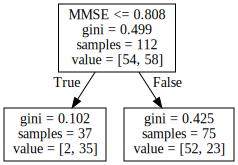

In [0]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(), out_file=None)
graph = graphviz.Source(dot_data)
graph

<font size="4">4) Random Forest Classifier

In [0]:
best_score = 0  

In [0]:

for n_estimators in range(2, 15, 2): # combines M trees
    for max_features in range(1, 9): # maximum number of features considered at each split
        for depth in range(1, 9): # maximum depth of the tree
            for split_criterion in ['gini', 'entropy']:
                forestModel = RandomForestClassifier(
                                                      n_estimators=n_estimators,
                                                      max_features=max_features,
                                                      n_jobs=4,
                                                      max_depth=depth,
                                                      # random_state=0,
                                                      criterion=split_criterion
                                                     )

                scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

                score = np.mean(scores)
                if score > best_score:
                    best_score = score
                    optimal_n = n_estimators
                    optimal_max_features = max_features
                    optimal_depth = depth
                    optimal_split = split_criterion

In [0]:
SelectedRFModel = RandomForestClassifier(
                                          n_estimators=optimal_n,
                                          max_features=optimal_max_features,
                                          n_jobs=4,
                                          max_depth=optimal_depth,
                                          random_state=0,
                                          criterion=optimal_split
                                        )
SelectedRFModel.fit(X_trainval_scaled, Y_trainval)

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj= SelectedRFModel
print("prediction for Random Forest", PredictedOutput)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of n_estimators are: ", optimal_n)
print("Best parameters of max_features are: ", optimal_max_features)
print("Best parameters of max_depth are: ", optimal_depth)
print("Best parameters of split criterian are: ", optimal_split)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

prediction for Random Forest [1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1
 0]
Best accuracy on validation set is: 0.7940711462450591
Best parameters of n_estimators are:  8
Best parameters of max_features are:  4
Best parameters of max_depth are:  7
Best parameters of split criterian are:  entropy
Test accuracy with the best parameters is 0.8157894736842105
Test recall with the best parameters is: 0.75
Test AUC with the best parameters is: 0.8194444444444443


In [0]:
m = 'Random Forest'
performance_metric.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])
print(performance_metric)

[['Logistic Regression', 0.7894736842105263, 0.75, 0.7916666666666667, array([0.        , 0.16666667, 1.        ]), array([0.  , 0.75, 1.  ]), array([2, 1, 0])], ['SVM', 0.7894736842105263, 0.7, 0.7944444444444444, array([0.        , 0.11111111, 1.        ]), array([0. , 0.7, 1. ]), array([2, 1, 0])], ['Decision Tree', 0.8157894736842105, 0.65, 0.825, array([0., 0., 1.]), array([0.  , 0.65, 1.  ]), array([2, 1, 0])], ['Random Forest', 0.8157894736842105, 0.75, 0.8194444444444443, array([0.        , 0.11111111, 1.        ]), array([0.  , 0.75, 1.  ]), array([2, 1, 0])]]


In [0]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.033977248547550666'],
       ['Age', '0.09044955156501314'],
       ['EDUC', '0.05130352193422574'],
       ['SES', '0.04333906034004381'],
       ['MMSE', '0.371437052728349'],
       ['eTIV', '0.033979127917164675'],
       ['nWBV', '0.22087953821305328'],
       ['ASF', '0.1546348987545998']], dtype='<U20')

<font size="4">5) KNN

In [0]:
best_score = 0

In [0]:
for n_neighbors in range(3, 10): # Iterate over different neighbors paramenter
    for algorithm in ['ball_tree', 'kd_tree', 'brute']: # Iterate over the different algorithms
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm)

        scores = cross_val_score(knn, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        score = np.mean(scores)
        if score > best_score:
            best_score = score
            optimal_n = n_neighbors
            optimal_alogrithm = algorithm

In [0]:
SelectedKNNModel = KNeighborsClassifier(n_neighbors=optimal_n, algorithm=optimal_alogrithm)
SelectedKNNModel.fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedKNNModel.predict(X_test_scaled)
test_score = SelectedKNNModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj= SelectedKNNModel
print("prediction for KNN", PredictedOutput)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of n_neighbors is: ", optimal_n)
print("Best parameters of algorithm is: ", optimal_alogrithm)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

prediction for KNN [1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
 0]
Best accuracy on validation set is: 0.6604743083003952
Best parameters of n_neighbors is:  6
Best parameters of algorithm is:  ball_tree
Test accuracy with the best parameters is 0.7105263157894737
Test recall with the best parameters is: 0.6
Test AUC with the best parameters is: 0.7166666666666668


In [0]:
m = 'KNN'
performance_metric.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])
print(performance_metric)

[['Logistic Regression', 0.7894736842105263, 0.75, 0.7916666666666667, array([0.        , 0.16666667, 1.        ]), array([0.  , 0.75, 1.  ]), array([2, 1, 0])], ['SVM', 0.7894736842105263, 0.7, 0.7944444444444444, array([0.        , 0.11111111, 1.        ]), array([0. , 0.7, 1. ]), array([2, 1, 0])], ['Decision Tree', 0.8157894736842105, 0.65, 0.825, array([0., 0., 1.]), array([0.  , 0.65, 1.  ]), array([2, 1, 0])], ['Random Forest', 0.8157894736842105, 0.75, 0.8194444444444443, array([0.        , 0.11111111, 1.        ]), array([0.  , 0.75, 1.  ]), array([2, 1, 0])], ['KNN', 0.7105263157894737, 0.6, 0.7166666666666668, array([0.        , 0.16666667, 1.        ]), array([0. , 0.6, 1. ]), array([2, 1, 0])]]


<font size="4">I) Compare the Models

In [0]:
# Performance Metric for each model
result = pd.DataFrame(performance_metric, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Logistic Regression,0.789474,0.75,0.791667
1,SVM,0.789474,0.70,0.794444
2,Decision Tree,0.815789,0.65,0.825000
3,Random Forest,0.815789,0.75,0.819444
4,KNN,0.710526,0.60,0.716667
